In [9]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
def load_clothes():
    train = np.loadtxt("./clothes/fashion-mnist_train.csv", skiprows=1, dtype=int, delimiter=',')
    test = np.loadtxt("./clothes/fashion-mnist_test.csv", skiprows=1, dtype=int, delimiter=',')
    
    # testing of code in notebook
    train = train[:100, :]
    test = test[:100, :]
    
    ytr = train[:,0]
    xtr = train[:,1:]
    
    yte = test[:,0]
    xte = test[:,1:]
    
    
    return xtr, ytr, xte, yte

c_xtr, c_ytr, c_xte, c_yte = load_clothes()

In [38]:
def resize_clothes(x):
    new_set = np.zeros(4096)
    
    for sample in x:
        sample = sample.astype(float)
        resized = cv2.resize(sample.reshape(28, 28), (64, 64))
        new_set = np.vstack((new_set, resized.ravel()))
        
    return new_set[1:]

c_xtr = resize_clothes(c_xtr)
c_xte = resize_clothes(c_xte)

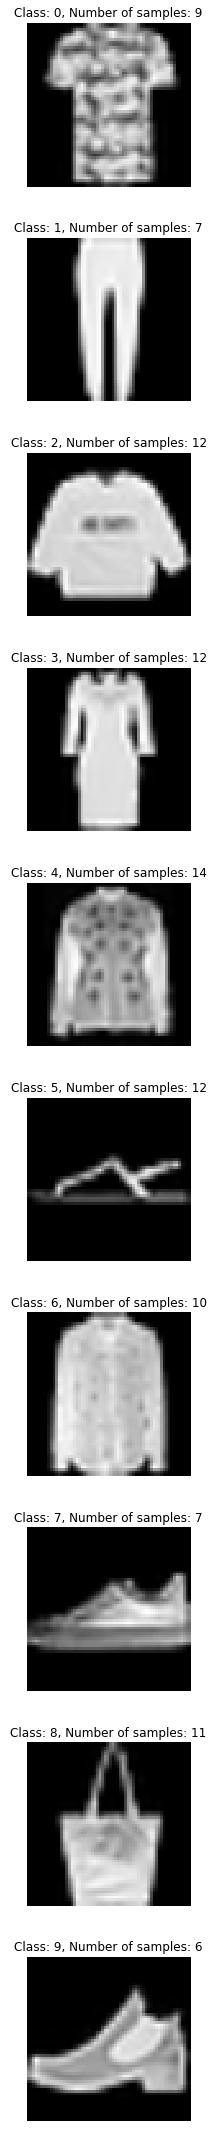

In [39]:
def plot_clothes(x, y):
    
    labels = np.unique(y)
    l = len(labels)
    c = 3
    
    f, ax = plt.subplots(l, 1, figsize=(c, c*l))
    f.tight_layout()
    
    for idx, label in enumerate(labels):
        positions = y == label
        x_labels = x[positions]
        nsamples = len(x_labels)
        
        sample = x_labels[0].reshape((64,64))
        
        ax[idx].imshow(sample, cmap="gray")
        ax[idx].axis("off")
        ax[idx].set_title("Class: {:d}, Number of samples: {:d}".format(label, nsamples))
        
        
plot_clothes(c_xtr, c_ytr)

In [41]:
def save(x, y, name):
    file = open(name, "wb")
    np.savez(file, inputs=x, targets=y)
    
save(c_xtr, c_ytr, "train_clothes.npz")